# MIMC-CXR dataset

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import sys
from torch.utils.data import Subset
from torchvision import transforms
import tqdm

###
if '../' not in sys.path:
    sys.path = ['../'] + sys.path
from lib.data import MIMIC_ahrf, MIMIC_train_transform, MIMIC_test_transform, MIMIC
from lib.eval import plot_log
from lib.eval import show_explanation, IntegratedGradients

In [2]:
# mimic = MIMIC_ahrf('chf_scale')
mimic = MIMIC('Edema')
mimic[0]

{'x': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x599 at 0x7F0081D9CAD0>,
 'y': 1,
 'filename': '/data1/jiaxuan/CredibleConceptModel/notebooks/../lib/../datasets/mimic-cxr-preprocessed/p10/p10000935/s50578979/d0b71acc-b5a62046-bbb5f6b8-7b173b85-65cdf738.jpg',
 'study_id': 50578979,
 'patient_id': 10000935,
 'gender': 'F',
 'task': 'Edema'}

In [3]:
print('# images:', len(mimic))

train_indices = list(range(100))
test_indices = list(range(100))
mimic_train = MIMIC_train_transform(Subset(mimic, train_indices))
mimic_test = MIMIC_test_transform(Subset(mimic, test_indices))

def show_data(d):
    '''d is dataset[idx]'''    
    filename = d['filename']

    print('--------------- represented in dataset')
    im, y = d['x'].permute(1,2,0), d['y'] 
    print('image size:',  im.shape)
    plt.imshow((im - im.min()) / (im.max() - im.min()))
    print(f'has {d["task"]}: {y}')
    plt.axis('off')
    plt.show()

# images: 107510


--------------- represented in dataset
image size: torch.Size([299, 299, 3])
has Edema: 1


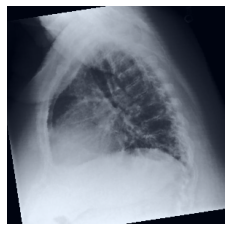

--------------- represented in dataset
image size: torch.Size([299, 299, 3])
has Edema: 1


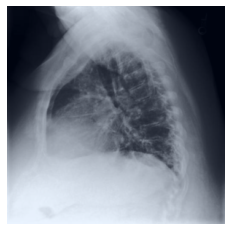

In [4]:
show_data(mimic_train[10])
show_data(mimic_test[10])

# Attribution

class id: 1
l2^2(grad): 0.20604273676872253


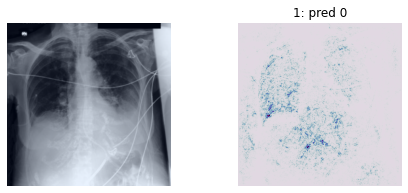

gender F
class id: 1
l2^2(grad): 0.74311363697052


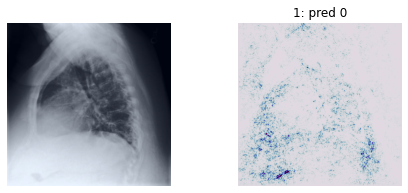

gender F
class id: 1
l2^2(grad): 10.657417297363281


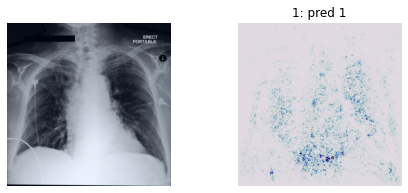

gender M


In [32]:
fn = f'../outputs/a67cb9785f0811ec830e8fa97a4e8129/standard.pt' # subsample gender 0.95
net =  nn.Sequential(torch.load(fn), nn.Softmax(1)) 
indices =[30,10,45] # [90, 20, 50] # [30, 10, 45]
for idx in indices:
    show_explanation(mimic_test, idx, [net], 
                     explain_method=lambda model: IntegratedGradients(model, steps=50))
    print('gender', mimic_test[idx]['gender'])

class id: 1
l2^2(grad): 3.1405029296875


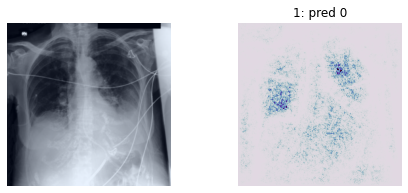

gender F
class id: 1
l2^2(grad): 2.2402210235595703


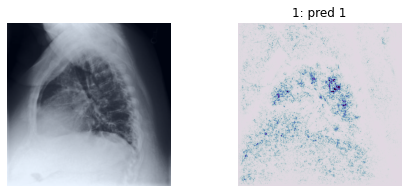

gender F
class id: 1
l2^2(grad): 4.222055912017822


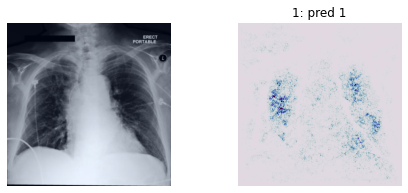

gender M


In [33]:
# see where unbiased model look at
fn = f'../outputs/b32e92fe5f2111ec830e8fa97a4e8129/standard.pt' # subsample gender 0
net =  nn.Sequential(torch.load(fn), nn.Softmax(1)) 
for idx in indices:
    show_explanation(mimic_test, idx, [net], 
                     explain_method=lambda model: IntegratedGradients(model, steps=50))
    print('gender', mimic_test[idx]['gender'])

class id: 1
l2^2(grad): 0.5155541896820068


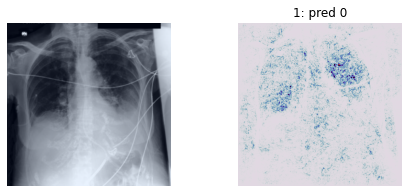

gender F
class id: 1
l2^2(grad): 0.15622864663600922


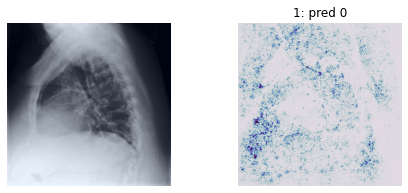

gender F
class id: 1
l2^2(grad): 3.0492982864379883


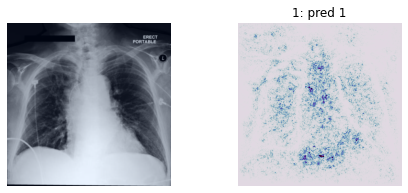

gender M


In [35]:
# subsample gender 0.9
# fn = '../outputs/7b0a1aac4b6111ecb773ac1f6b24a434/ccm.pt'
fn = '../outputs/5a4ce99a4b3711ecb773ac1f6b24a434/standard.pt'
#fn = '../outputs/5df7a9fe4b3711ecb773ac1f6b24a434/cbm.pt'
net =  nn.Sequential(torch.load(fn), nn.Softmax(1)) 
indices =[30,10,45] # [90, 20, 50] # [30, 10, 45]
for idx in indices:
    show_explanation(mimic_test, idx, [net], 
                     explain_method=lambda model: IntegratedGradients(model, steps=50))
    print('gender', mimic_test[idx]['gender'])

class id: 1
l2^2(grad): 0.21284933388233185


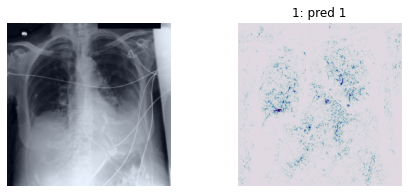

gender F
class id: 1
l2^2(grad): 0.15732651948928833


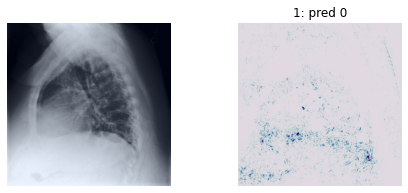

gender F
class id: 1
l2^2(grad): 0.11101438105106354


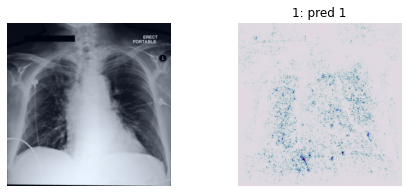

gender M


In [56]:
# subsample gender 0.9
# fn = '../outputs/7b0a1aac4b6111ecb773ac1f6b24a434/ccm.pt' # 0.01
fn = '../outputs/869ce19c4bc511ecb773ac1f6b24a434/ccm.pt' # 0.1
# fn = '../outputs/36dbcf544bf911ecb773ac1f6b24a434/ccm.pt' # 0
net = torch.load(fn) # .net_u
net.c_no_grad = False
net.u_no_grad = False
net =  nn.Sequential(net, nn.Softmax(1)) 
indices =[30,10,45] # [90, 20, 50] # [30, 10, 45]
for idx in indices:
    show_explanation(mimic_test, idx, [net], 
                     explain_method=lambda model: IntegratedGradients(model, steps=50))
    print('gender', mimic_test[idx]['gender'])

class id: 1
l2^2(grad): 0.4595996141433716


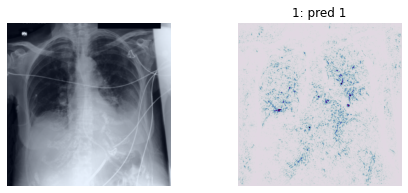

gender F
class id: 1
l2^2(grad): 0.2518256902694702


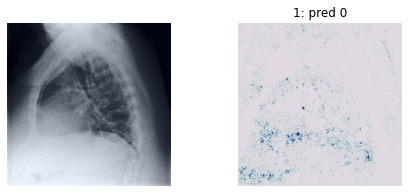

gender F
class id: 1
l2^2(grad): 0.2122696489095688


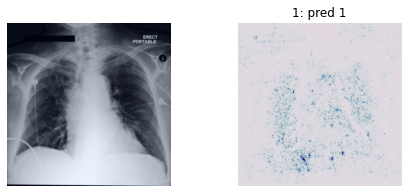

gender M


In [52]:
# subsample gender 0.9
fn = '../outputs/5df7a9fe4b3711ecb773ac1f6b24a434/cbm.pt'
net = torch.load(fn)
net.c_no_grad = False
net =  nn.Sequential(net, nn.Softmax(1)) 

indices =[30,10,45] # [90, 20, 50] # [30, 10, 45]
for idx in indices:
    show_explanation(mimic_test, idx, [net], 
                     explain_method=lambda model: IntegratedGradients(model, steps=50))
    print('gender', mimic_test[idx]['gender'])

# old images

(<matplotlib.image.AxesImage at 0x7ff3a90ee6d0>, torch.Size([3, 512, 615]))

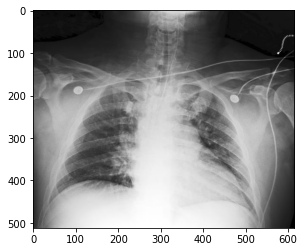

In [24]:
idx = 0
plt.imshow(mimic[idx]['x']), transforms.ToTensor()(mimic[idx]['x']).shape

--------------- represented in dataset
image size: torch.Size([299, 299, 3])
has Edema: 1


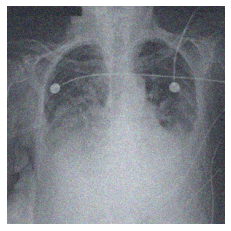

--------------- represented in dataset
image size: torch.Size([299, 299, 3])
has Edema: 1


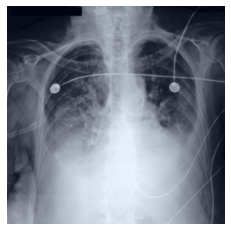

In [153]:
def show_noise(d, s=0.1):
    '''d is dataset[idx]'''    
    filename = d['filename']

    print('--------------- represented in dataset')
    im, y = (d['x'] + s * torch.randn_like(d['x'])).permute(1,2,0), d['y'] 
    print('image size:',  im.shape)
    plt.imshow((im - im.min()) / (im.max() - im.min()))
    print(f'has {d["task"]}: {y}')
    plt.axis('off')
    plt.show()
    
idx = 66
show_noise(mimic_test[idx], 0.5)
show_data(mimic_test[idx])

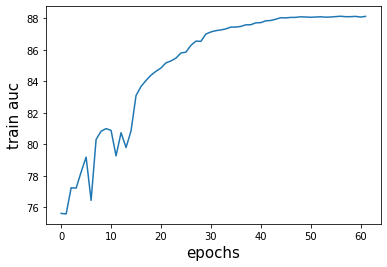

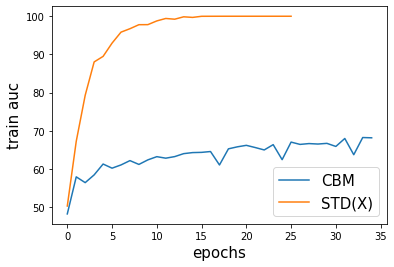

In [96]:
key = 'train auc'
plot_log(torch.load("../outputs/3b52388a27ea11ecb773ac1f6b24a434/standard.log"), key=key, label="C") # concept model
plt.show()
plot_log(torch.load("../outputs/cdfff6ba27fc11ecb773ac1f6b24a434/cbm.log"), key=key, label='CBM') # cbm
plot_log(torch.load("../outputs/d421aaf227c511ecb773ac1f6b24a434/standard.log"), key=key, label='STD(X)') # std(x)
plt.legend(fontsize=15)
plt.show()

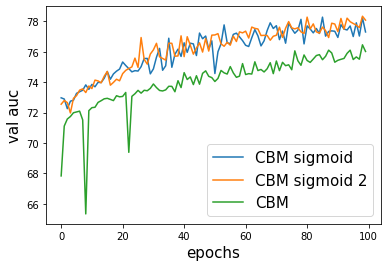

In [124]:
key = 'val auc'
plot_log(torch.load("../outputs/cbm.log"), key=key, label='CBM sigmoid') # cbm sigmoid
plot_log(torch.load("../outputs/a4845792288611ecb773ac1f6b24a434/cbm.log"), key=key, label='CBM sigmoid 2') # cbm sigmoid
plot_log(torch.load("../outputs/6101f5e0287e11ecb773ac1f6b24a434/cbm.log"), key=key, label='CBM') # cbm 2 output
plt.legend(fontsize=15)
#plt.ylim(75)
plt.show()

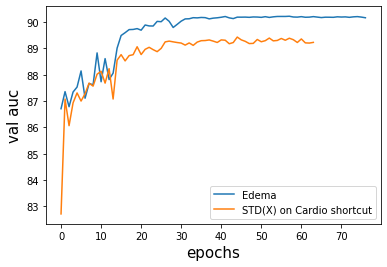

In [161]:
key = 'val auc'
#plot_log(torch.load("../outputs/3b9e1bb0286711ecb773ac1f6b24a434/standard.log"), key=key, label='Atelectasis')
#plot_log(torch.load("../outputs/daccd3ac286711ecb773ac1f6b24a434/standard.log"), key=key, label='Pneumothorax')
plot_log(torch.load("../outputs/87381eaa286611ecb773ac1f6b24a434/standard.log"), key=key, label='Edema')
plot_log(torch.load("../outputs/f073b27628d411ecb773ac1f6b24a434/standard.log"), key=key, label='STD(X) on Cardio shortcut')

#plot_log(torch.load("../outputs/b19314ba289911ecb773ac1f6b24a434/standard.log"), key=key, label='Pleural Effusion')

plt.legend()
plt.show()


# correlation between tasks

In [158]:
mimic.df.corr()

,Unnamed: 0,index,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Lesion,Lung Opacity,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,pt_id
Unnamed: 0,1.000000,0.999999,0.003738,0.004842,-0.007574,-0.000767,-0.007681,-0.002177,-0.000756,0.001474,-0.000336,0.007507,0.015711,-0.011637,-0.004171,-0.000660,-0.001697
index,0.999999,1.000000,0.003731,0.004840,-0.007574,-0.000783,-0.007684,-0.002160,-0.000768,0.001462,-0.000338,0.007503,0.015707,-0.011643,-0.004166,-0.000674,-0.001706
No Finding,0.003738,0.003731,1.000000,-0.064294,-0.181646,-0.039678,-0.188123,-0.390872,-0.083370,0.055297,-0.208732,-0.099302,-0.111160,-0.040125,-0.042421,-0.113892,0.004183
Enlarged Cardiomediastinum,0.004842,0.004840,-0.064294,1.000000,-0.058316,0.017928,0.093246,-0.032388,0.074672,0.006784,0.077020,0.227117,0.097502,0.021861,0.027760,0.149506,-0.005585
Cardiomegaly,-0.007574,-0.007574,-0.181646,-0.058316,1.000000,-0.021950,-0.061142,-0.024914,-0.010244,-0.064838,0.028541,0.072342,0.097001,-0.007367,0.002559,0.109910,-0.006976
Lung Lesion,-0.000767,-0.000783,-0.039678,0.017928,-0.021950,1.000000,0.081470,-0.033911,0.022037,0.048272,-0.025801,0.005046,-0.001634,0.038499,0.006032,-0.035924,-0.001508
Lung Opacity,-0.007681,-0.007684,-0.188123,0.093246,-0.061142,0.081470,1.000000,0.139848,0.012603,0.288952,0.168281,0.028737,0.047082,0.035313,-0.008456,0.036147,-0.002594
Edema,-0.002177,-0.002160,-0.390872,-0.032388,-0.024914,-0.033911,0.139848,1.000000,0.088726,-0.068486,0.010796,-0.041668,0.065347,-0.053604,-0.060499,0.042749,-0.004903
Consolidation,-0.000756,-0.000768,-0.083370,0.074672,-0.010244,0.022037,0.012603,0.088726,1.000000,0.078022,0.061790,0.109920,0.082291,0.001324,-0.002959,0.058776,0.001392
Pneumonia,0.001474,0.001462,0.055297,0.006784,-0.064838,0.048272,0.288952,-0.068486,0.078022,1.000000,0.005250,-0.070426,-0.034014,0.026868,-0.004972,-0.094451,0.006358
